In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('/Users/Downloads/dataset.csv')
df.shape

(5172, 3002)

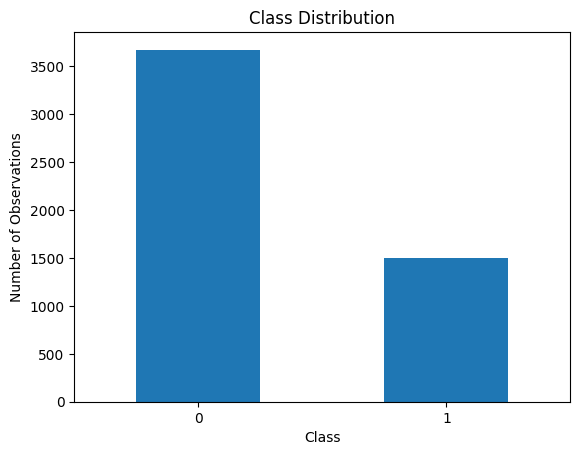

In [6]:
# Showing the class imbalance between non-spam and pam 
# Create a pivot table
table = df.pivot_table(index='Prediction', aggfunc='size')

# Plot the pivot table as a bar chart
table.plot(kind='bar', rot=0, legend=False)

# Add labels to the x and y axes
plt.xlabel("Class")
plt.ylabel("Number of Observations")

# Give the graph a title
plt.title("Class Distribution")

# Rename the classes
classes = {"0": "Not Spam", "1": "Spam"}
table.index = [classes[str(x)] for x in table.index]

# Show the plot
plt.show()

In [23]:
class_counts = df["Prediction"].value_counts()
print(class_counts)

0    3672
1    1500
Name: Prediction, dtype: int64


In [7]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [8]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [9]:
#Drop Email column from dataset
df_1 = df.drop('Email No.', axis=1)
df_1.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [10]:
# Putting independent variables/features to X
X = df_1.drop('Prediction',axis=1)

# Putting response/dependent variable/feature to y

Y = df_1['Prediction']

In [11]:
# Splitting the data into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=14)

Random Forest

In [12]:
# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [14]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: ", accuracy)

# Calculate precision
precision = precision_score(Y_test, y_pred)
print("Precision: ", precision)

# Calculate recall
recall = recall_score(Y_test, y_pred)
print("Recall: ", recall)

# Calculate F1 score
f1 = f1_score(Y_test, y_pred)
print("F1 Score: ", f1)

Accuracy:  0.970048309178744
Precision:  0.9424920127795527
Recall:  0.9577922077922078
F1 Score:  0.9500805152979066


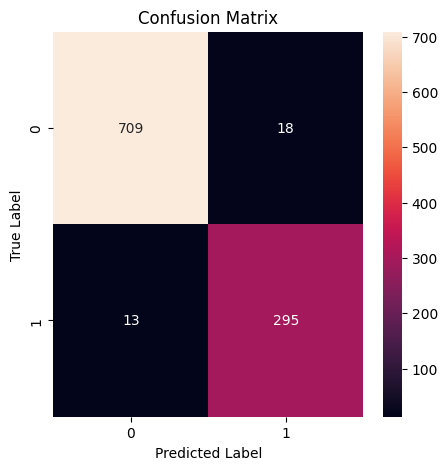

In [15]:
# Calculate the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
#extracts numerous metrics about the model
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       727
           1       0.94      0.96      0.95       308

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



SMOTE (Synthetic Minority Over-sampling Technique)

In [17]:
# Oversample the minority class using SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=0)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, Y_train)

In [18]:
# Build the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [19]:
# Predict the target variable for the test data
y_pred = clf.predict(X_test)

In [20]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: ", accuracy)

# Calculate precision
precision = precision_score(Y_test, y_pred)
print("Precision: ", precision)

# Calculate recall
recall = recall_score(Y_test, y_pred)
print("Recall: ", recall)

# Calculate F1 score
f1 = f1_score(Y_test, y_pred)
print("F1 Score: ", f1)

Accuracy:  0.966183574879227
Precision:  0.9074626865671642
Recall:  0.987012987012987
F1 Score:  0.9455676516329706


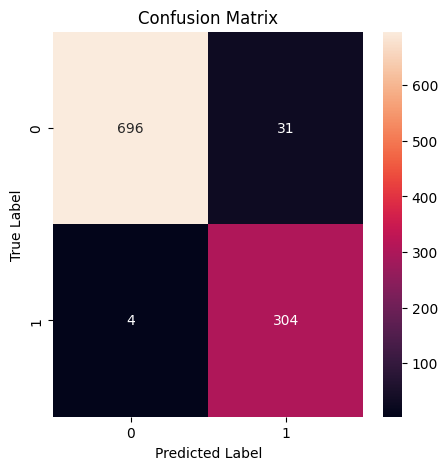

In [21]:
# Calculate the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [22]:
#extracts numerous metrics about the model
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       727
           1       0.91      0.99      0.95       308

    accuracy                           0.97      1035
   macro avg       0.95      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



Based on the metrics, it seems that Model 2(SMOTE Random Forest Classifier) has a higher recall (0.9870), meaning it has a higher ability to detect positive cases correctly. On the other hand, Model 1 has a higher precision (0.9425), meaning it is better at avoiding false positive cases.

Since this is a spam email filtering task, a model with higher precision is preferred to minimize false positives (i.e., marking non-spam emails as spam), even if it results in more false negatives. As such model 1(Vanilla Random Forest Classifier) is selected